In [1]:
import os 
import tarfile
from six.moves import urllib 

## Fetching the data 

In [2]:
DOWNLOAD_ROOT ="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH= os.path.join("datasets" , "housing")
HOUSING_URL= DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path =os.path.join(housing_path ,"housing.tgz")
    urllib.request.urlretrieve(housing_url ,tgz_path)
    housing_tgz= tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [3]:
fetch_housing_data()

## load the data 

In [4]:
import pandas as pd 

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path ,"housing.csv")
    return pd.read_csv(csv_path)
    

In [5]:
housing =load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


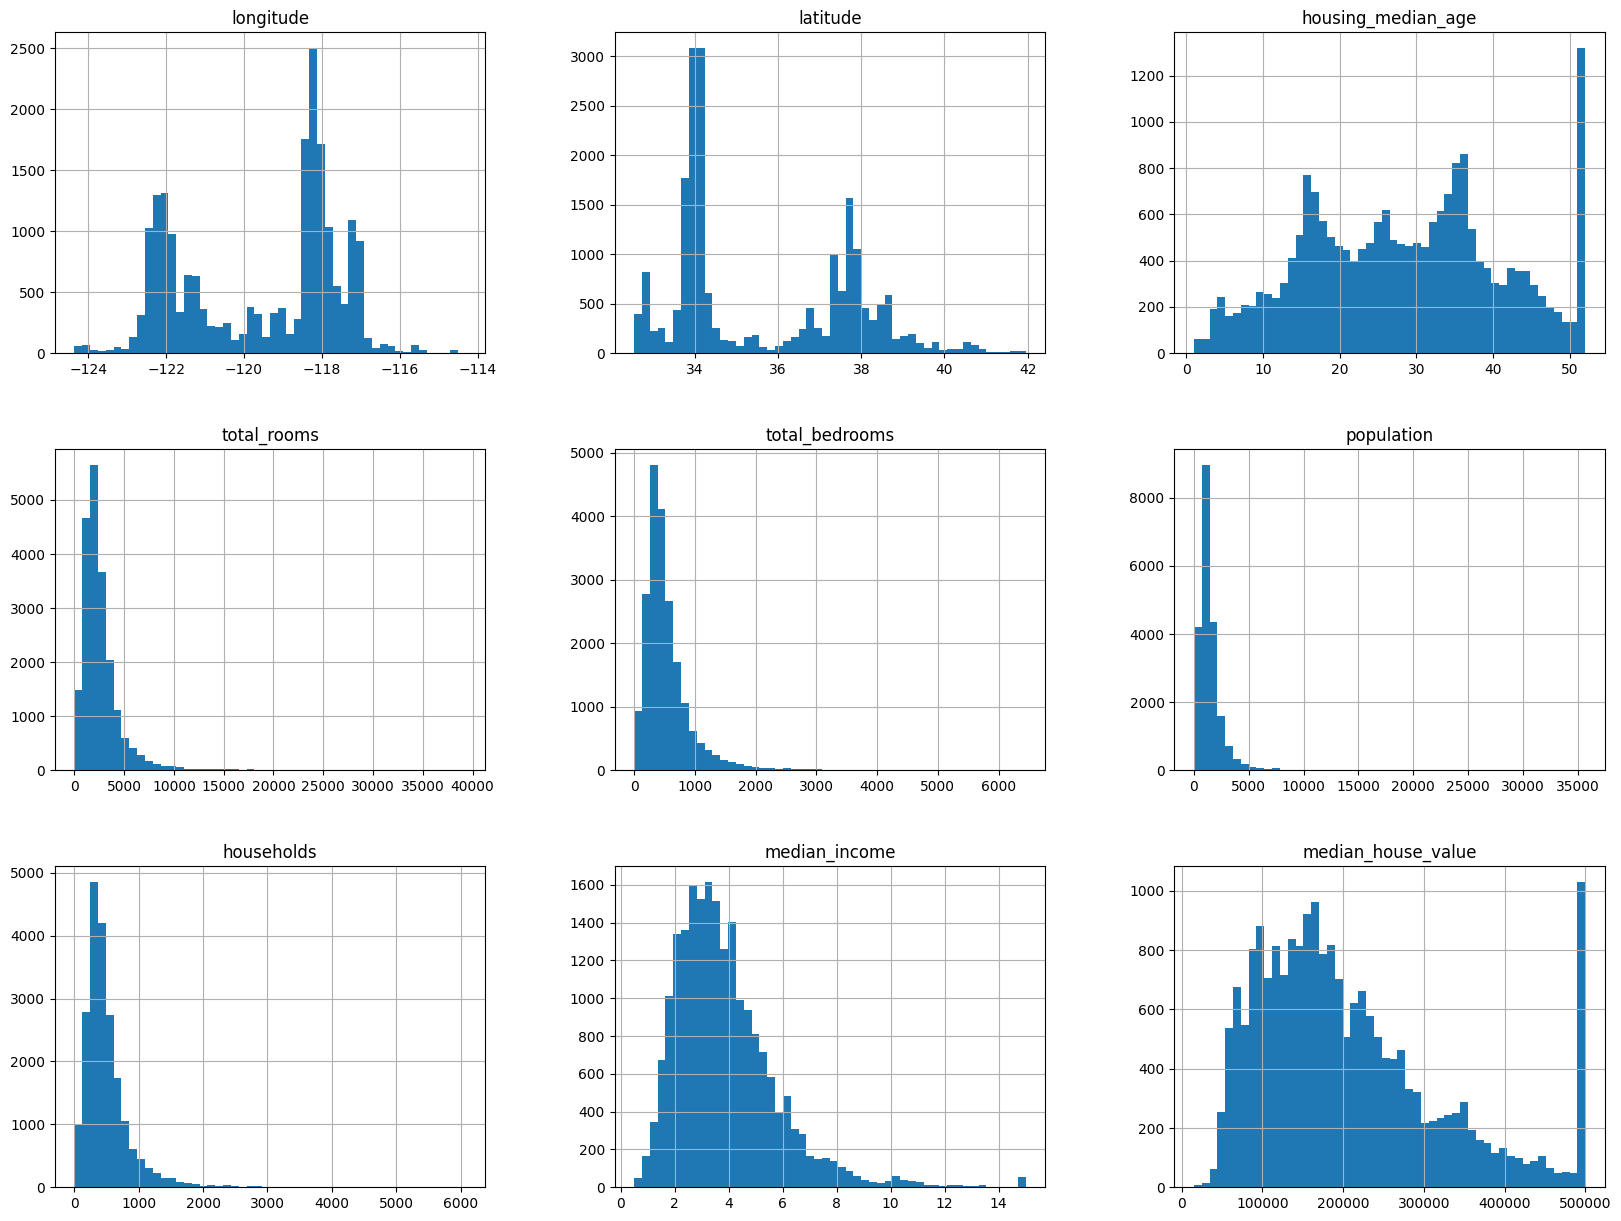

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt 
housing.hist(bins=50 , figsize=(20,15))
plt.show()

In [9]:
import numpy as np 

def split_train_test(data , test_ratio):
    np.random.seed(42)
    shuffled_indices =np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size :]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [10]:
train_set, test_set =split_train_test(housing , 0.2)
print(len(train_set) , "train +" , len(test_set),"test")

16512 train + 4128 test


In [11]:
from sklearn.model_selection import train_test_split 

train_set , test_set =train_test_split(housing , test_size = 0.2 , random_state =42)

In [12]:
housing["income_cat"] =np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5 , 5.0 )

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
for train_index ,test_index in split.split(housing ,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3.0     0.350533
2.0     0.318798
4.0     0.176357
5.0     0.069041
1.0     0.039729
6.0     0.025678
7.0     0.009205
8.0     0.005087
11.0    0.002422
9.0     0.002422
10.0    0.000727
Name: count, dtype: float64

In [15]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

income_cat
3.0     0.350594
2.0     0.318859
4.0     0.176296
5.0     0.068920
1.0     0.039850
6.0     0.025799
7.0     0.009145
8.0     0.005087
9.0     0.002422
11.0    0.002362
10.0    0.000666
Name: count, dtype: float64

In [16]:
for set_ in (strat_train_set , strat_test_set):
    set_.drop("income_cat" , axis=1 , inplace=True)

##Visualize data to gain insights

In [17]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

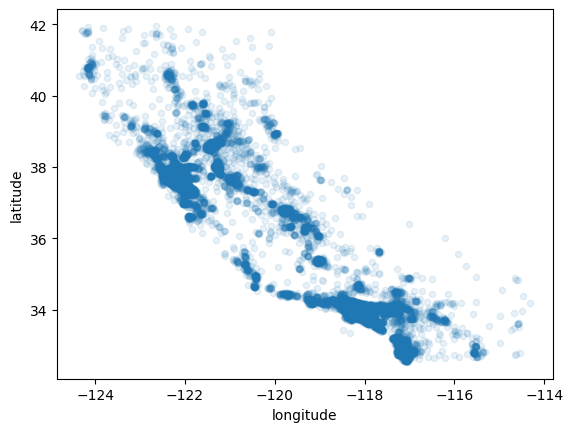

In [18]:
housing.plot(kind="scatter" , x="longitude", y="latitude" , alpha=0.1)

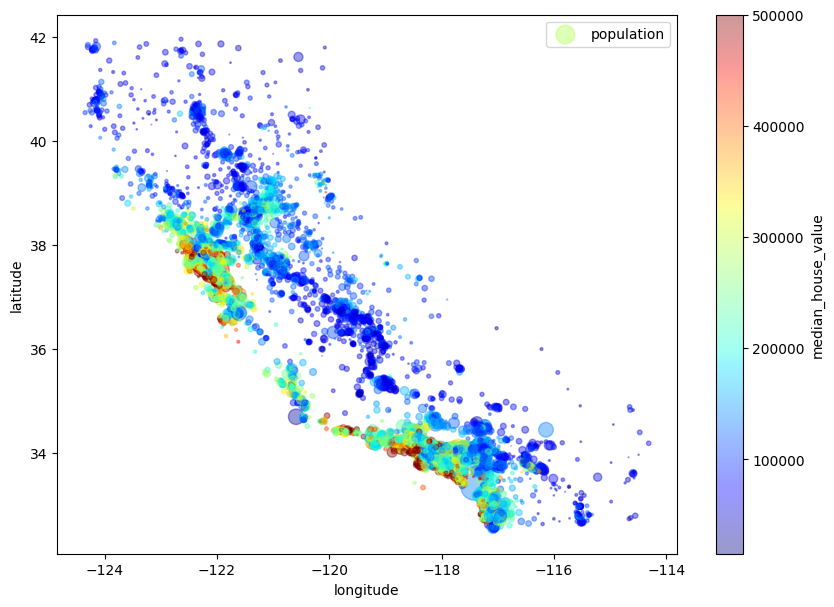

In [19]:
housing.plot(kind="scatter" , x="longitude", y="latitude" , alpha=0.4,
            s=housing["population"]/100 , label="population" ,figsize=(10,7),
            c="median_house_value" , cmap=plt.get_cmap("jet") , colorbar=True)
plt.legend()

## looking for correlations

In [20]:
import pandas as pd


In [21]:
corr_matrix = housing.corr(numeric_only=True)

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687474
total_rooms           0.135989
housing_median_age    0.111770
households            0.065841
total_bedrooms        0.049177
population           -0.024765
longitude            -0.045056
latitude             -0.144684
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

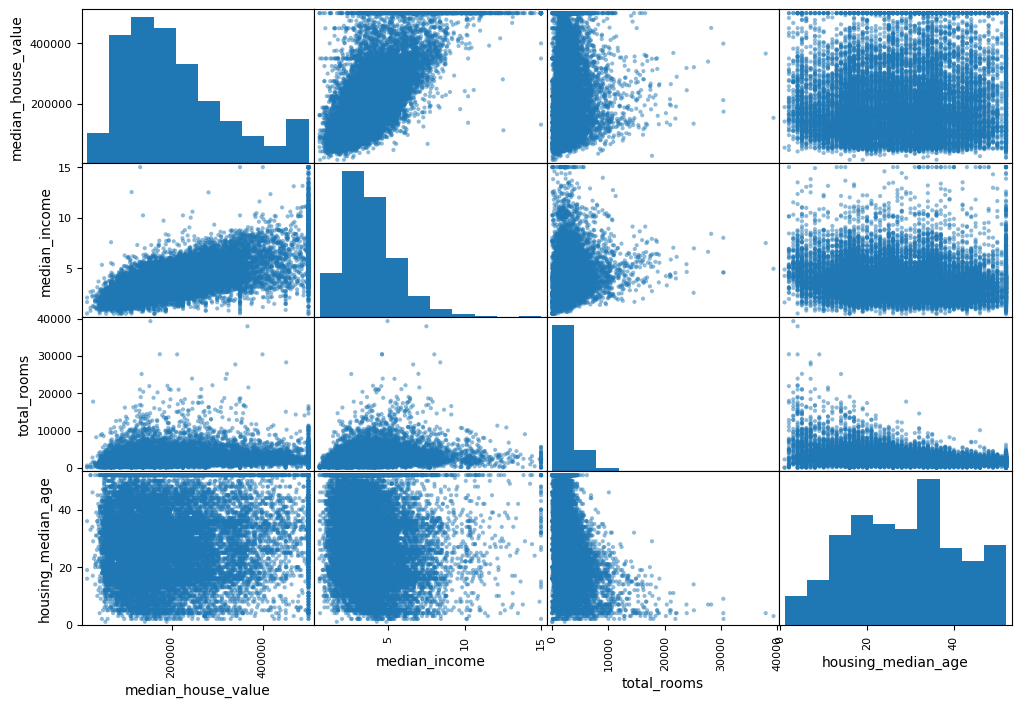

In [23]:
from pandas.plotting import scatter_matrix 

attributes =["median_house_value" , "median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes] , figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

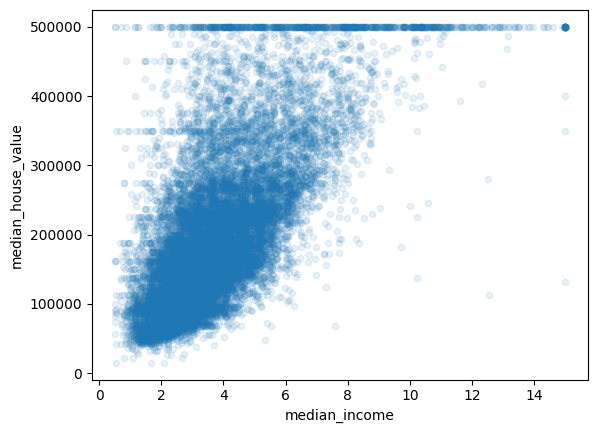

In [24]:
housing.plot(kind="scatter" , x="median_income" , y="median_house_value" ,alpha=0.1)

In [25]:
 housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
 housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
 housing["population_per_household"]=housing["population"]/housing["households"]

In [26]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687474
rooms_per_household         0.145750
total_rooms                 0.135989
housing_median_age          0.111770
households                  0.065841
total_bedrooms              0.049177
population_per_household   -0.021844
population                 -0.024765
longitude                  -0.045056
latitude                   -0.144684
bedrooms_per_room          -0.259679
Name: median_house_value, dtype: float64

## Prepare the data for ML Algorithms

In [27]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(strategy="median")


In [29]:
housing_num = housing.drop("ocean_proximity" , axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [31]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [32]:
X= imputer.transform(housing_num)

In [33]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-122.46  ,   37.79  ,   52.    , ...,  304.    ,  110.    ,
          14.2959],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [34]:
housing_tr = pd.DataFrame(X , columns=housing_num.columns)

In [35]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.571860,35.635516,28.633721,2628.436955,534.731589,1421.965540,497.690286,3.873393
std,2.002105,2.137953,12.582583,2155.690963,411.401695,1119.674776,376.108851,1.899090
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1444.000000,296.000000,785.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2122.000000,434.000000,1166.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3146.000000,642.000000,1720.000000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [36]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
15698      NEAR BAY
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
9026     NEAR OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [37]:
housing_cat_encoded , housing_categories =housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 2, 3, 0, 3, 2, 3, 0, 0], dtype=int64)

In [38]:
housing_categories 

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [39]:
from sklearn.preprocessing import OneHotEncoder 
encoder=OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [40]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Custom Transformers

In [41]:
from sklearn.base import BaseEstimator , TransformerMixin 

rooms_ix , bedrooms_ix ,population_ix , household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator , TransformerMixin):
    def __init__(self , add_bedrooms_per_room =True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self , X , y=None):
        return self 
    def transform(self , X , y=None):
        rooms_per_household = X[: , rooms_ix]/X[: , household_ix]
        population_per_household = X[: ,population_ix]/X[: , household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[: , bedrooms_ix]/X[: , rooms_ix]
            return np.c_[X ,rooms_per_household ,population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X , rooms_per_household , population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)



In [42]:
from sklearn.base import BaseEstimator , TransformerMixin 

class DataFrameSelector(BaseEstimator , TransformerMixin ):
    def __init__(self , attribute_names ):
        self.attribute_names = attribute_names 
    def fit(self , X , y=None):
        return self 
    def transform(self, X):
        return X[self.attribute_names].values 

In [43]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

num_attributes = list(housing_num)
cat_attributes =["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector' , DataFrameSelector(num_attributes)),
    ('imputer' , SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler ', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector' , DataFrameSelector(cat_attributes)),
    ('cat_encoder', OneHotEncoder(sparse_output =False)),
])

In [44]:
from sklearn.pipeline import FeatureUnion 

full_pipeline =FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline ),
    ("cat_pipeline" , cat_pipeline),
])

    


In [45]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared 

array([[-1.15788621,  0.77388697,  0.74440696, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44259512,  1.0077626 ,  1.85708974, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.18471864, -1.3403487 ,  0.18806557, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7801323 , -0.84920988,  0.18806557, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43760023,  0.99840757,  1.85708974, ...,  0.        ,
         1.        ,  0.        ]])

In [46]:
housing_prepared.shape

(16512, 16)

In [47]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared , housing_labels)

LinearRegression()

In [48]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:" , lin_reg.predict(some_data_prepared))
print("Lables:" , list(some_labels))

Predictions: [209300.18149413 661078.1135578  210913.91718561  57466.84542129
 186707.41879655]
Lables: [286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68321.70513040475

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared , housing_labels)


DecisionTreeRegressor()

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels , housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse 

0.0

In [52]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(tree_reg , housing_prepared , housing_labels ,
                        scoring ="neg_mean_squared_error" , cv =10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:" , scores)
    print("Mean:" , scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70021.3244105  66662.36838091 66463.69463258 69505.76358614
 70010.52154497 75538.65841812 67920.15855412 72206.52275306
 73182.61786383 71043.97462151]
Mean: 70255.5604765752
Standard deviation: 2726.3001232542892


In [54]:
lin_scores = cross_val_score(lin_reg ,housing_prepared , housing_labels,
                            scoring ="neg_mean_squared_error" , cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66614.9761906  66150.38653105 67344.60010664 74470.89010773
 71434.35592111 69791.47991185 65376.52916665 67643.17772272
 69655.23105926 67378.82020947]
Mean: 68586.04469270927
Standard deviation: 2633.3746663788174


In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared , housing_labels )


RandomForestRegressor()

In [56]:
housing_prediction = forest_reg.predict(housing_prepared)
forest_reg_mse = mean_squared_error(housing_prediction , housing_labels)
forest_rmse = np.sqrt(forest_reg_mse)


In [57]:
forest_rmse 

18773.11346018134

In [58]:
forest_scores = cross_val_score(forest_reg, housing_prepared,housing_labels,
                               scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
                                

Scores: [49399.4513991  47084.96375702 49215.55146812 51588.22716345
 51611.31639866 53454.81351708 49011.37616866 48389.18764041
 52847.44469428 50615.38574942]
Mean: 50321.77179562138
Standard deviation: 1937.817341157584


In [59]:
import joblib 

joblib.dump(tree_reg , "housing_model.pkl")


['housing_model.pkl']

In [60]:
joblib.dump(full_pipeline, "full_pipeline.pkl")

['full_pipeline.pkl']